# [Exercise 2](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E02_sklearn.ipynb)

In [48]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot

mpg_raw = seaborn.load_dataset('mpg')

## 0

### a)

In [49]:
mpg_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [50]:
mpg_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
mpg_dropped_na = mpg_raw.dropna()
mpg_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [52]:
mpg_dropped_na.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


### b)

In [53]:
mpg_dropped_na.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
mpg_dropped_na_and_unusable_columns = mpg_dropped_na[mpg_dropped_na.columns.difference(['name', 'origin', 'model_year'])]
mpg_dropped_na_and_unusable_columns.describe().T.drop('count', axis='columns')

,mean,std,min,25%,50%,75%,max
acceleration,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
cylinders,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
mpg,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
weight,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0


### c)

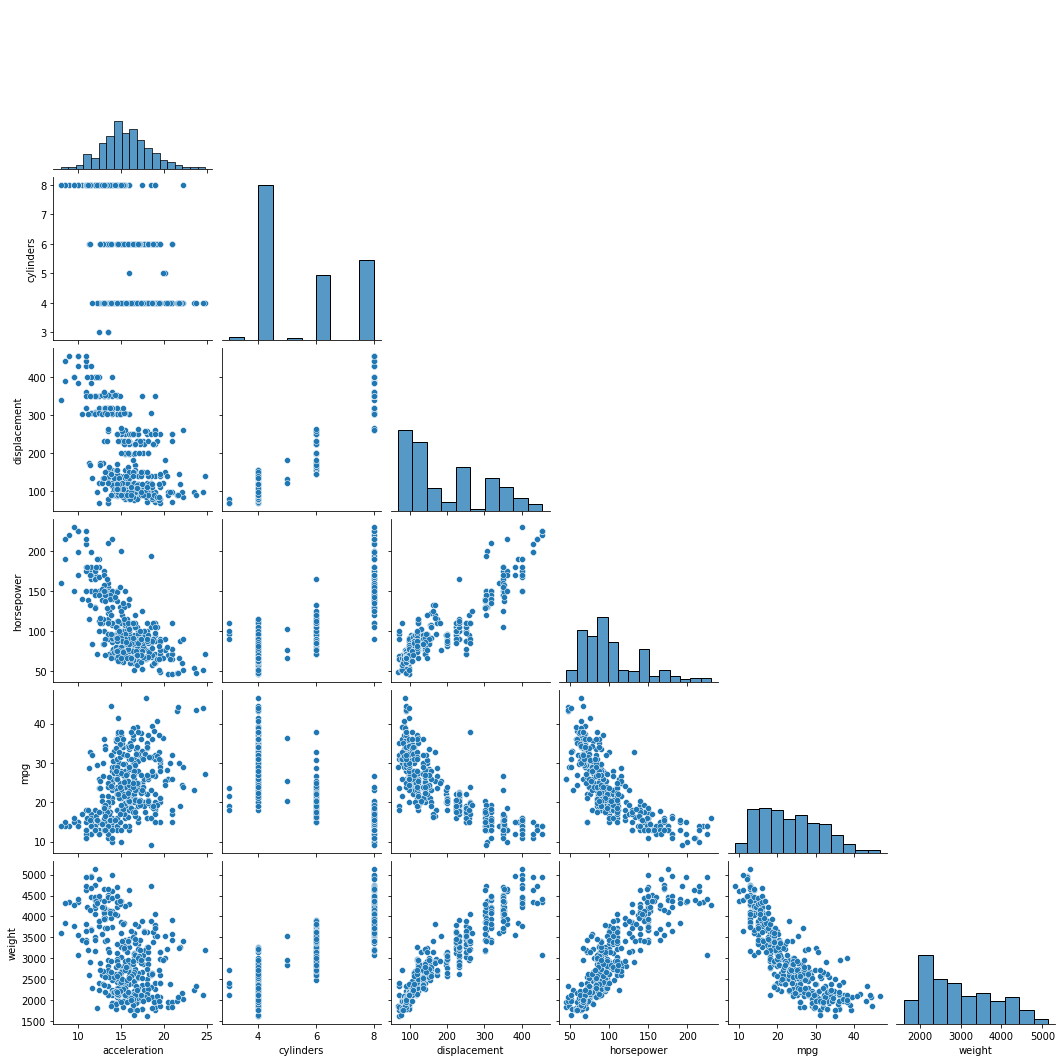

In [55]:
seaborn.pairplot(mpg_dropped_na_and_unusable_columns, corner=True)

## 1

In [56]:
mpg_dropped_na_and_unusable_columns.columns

Index(['acceleration', 'cylinders', 'displacement', 'horsepower', 'mpg',
       'weight'],
      dtype='object')

In [60]:
X, y = mpg_dropped_na_and_unusable_columns[mpg_dropped_na_and_unusable_columns.columns.difference(['mpg'])], mpg_dropped_na_and_unusable_columns['mpg']
X.shape, y.shape

((392, 5), (392,))

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 5), (79, 5), (313,), (79,))

In [69]:
print(f'Train split: {392 * 0.8}\nTest split:{392 * 0.2}\nTrain split is rounded down in train_test_split()')

Train split: 313.6
Test split:78.4
Train split is rounded down in train_test_split()
